In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./fashion-mnist_test.csv")
x = data.values
X = x[:,1:]
y = x[:,0]
X = X/255.0

print (X.shape,y.shape)

((10000, 784), (10000,))


In [3]:
X_train = X[:8000,:]
X_val = X[8000:,:]

y_train = y[:8000]
y_val = y[8000:]

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

((8000, 784), (8000,))
((2000, 784), (2000,))


In [4]:
INP = 784
H1_SIZE = 256
H2_SIZE = 64
OUT = 10
BATCH_SIZE = 200
EPOCH = 50
LR = 0.0003

In [5]:
def accuracy(y_pred,y_act):
    return ( 100.0*np.sum(y_pred==y_act)/y_pred.shape[0] )

In [6]:
def ini_weights():
    
    np.random.seed(0)
    model = {}
    model["W1"] = np.random.randn(INP,H1_SIZE)/np.sqrt(INP)
    model["B1"] = np.zeros((1,H1_SIZE))
    model["W2"] = np.random.randn(H1_SIZE,H2_SIZE)/np.sqrt(H1_SIZE)
    model["B2"] = np.zeros((1,H2_SIZE))
    model["W3"] = np.random.randn(H2_SIZE,OUT)/np.sqrt(H2_SIZE)
    model["B3"] = np.zeros((1,OUT))
    
    return model

In [7]:
def forward_prop(model,x):
    z1 = x.dot(model["W1"]) + model["B1"]
    a1 = np.tanh(z1)
    z2 = a1.dot(model["W2"]) + model["B2"]
    a2 = np.tanh(z2)
    z3 = a2.dot(model["W3"]) + model["B3"]
    h_x = np.exp(z3)
    y_out = h_x/ np.sum(h_x, axis=1, keepdims=True)
    
    return a1,a2,y_out

In [8]:
def back_prop(model, x , a1, a2, y_out, y_act):
    delta4 = y_out
    delta4[range(y_act.shape[0]), y_act] -= 1
    dw3 = (a2.T).dot(delta4)
    db3 = np.sum(delta4, axis=0)
    delta3 = (1-np.square(a2))*delta4.dot(model["W3"].T)
    dw2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0)
    delta2 = (1-np.square(a1))*delta3.dot(model["W2"].T)
    dw1 = (x.T).dot(delta2)
    db1 = np.sum(delta2, axis=0)
    
    model["W1"] -= LR*dw1
    model["B1"] -= LR*db1
    model["W2"] -= LR*dw2
    model["B2"] -= LR*db2
    model["W3"] -= LR*dw3
    model["B3"] -= LR*db3
    
    return model

In [9]:
def loss(model, y_pred, y_act):
    correct_logprobs = -np.log(y_pred[range(y_act.shape[0]), y_act])
    l = np.sum(correct_logprobs)
    
    return(1.0/y_pred.shape[0])*l

In [10]:
def predict(y_out):
    return np.argmax(y_out,axis=1)

In [11]:
def main():
    training_loss = []
    val_loss = []
    val_acc = []
    model = ini_weights()
    
    for e in range(EPOCH):
        print ("\n Epoch : %d" %(e+1))
        count = 0
        while (count + BATCH_SIZE) < y_train.shape[0]:
            batch_data = X_train[count:(count+BATCH_SIZE),:]
            batch_labels = y_train[count:(count+BATCH_SIZE),]
            count += BATCH_SIZE
            
            a1,a2,y_out = forward_prop(model,batch_data)
            model = back_prop(model,batch_data,a1,a2,y_out,batch_labels)
            
        _,_,p = forward_prop(model,X_train)
        training_loss.append(loss(model,p,y_train))
            
        print('training_loss : %.3f' %(loss(model,p,y_train)))
            
        _,_,p = forward_prop(model,X_val)
        pred = predict(p)
        val_loss.append(loss(model,p,y_val))
        val_acc.append(accuracy(pred,y_val))
        print('validation_loss : %.3f' %(loss(model,p,y_val)))
        print('validation_acc : %.3f' %(accuracy(pred,y_val)))
    print ("##############COMPLETED############")
    
    return training_loss,val_loss,val_acc
    

In [12]:
training_loss,val_loss,val_acc = main()


 Epoch : 1
training_loss : 1.022
validation_loss : 1.024
validation_acc : 66.950

 Epoch : 2
training_loss : 0.805
validation_loss : 0.805
validation_acc : 72.850

 Epoch : 3
training_loss : 0.710
validation_loss : 0.708
validation_acc : 75.750

 Epoch : 4
training_loss : 0.651
validation_loss : 0.647
validation_acc : 77.000

 Epoch : 5
training_loss : 0.608
validation_loss : 0.605
validation_acc : 79.300

 Epoch : 6
training_loss : 0.576
validation_loss : 0.574
validation_acc : 79.850

 Epoch : 7
training_loss : 0.552
validation_loss : 0.551
validation_acc : 80.750

 Epoch : 8
training_loss : 0.532
validation_loss : 0.533
validation_acc : 80.950

 Epoch : 9
training_loss : 0.516
validation_loss : 0.520
validation_acc : 81.200

 Epoch : 10
training_loss : 0.503
validation_loss : 0.509
validation_acc : 81.800

 Epoch : 11
training_loss : 0.491
validation_loss : 0.500
validation_acc : 82.200

 Epoch : 12
training_loss : 0.481
validation_loss : 0.493
validation_acc : 82.300

 Epoch : 13


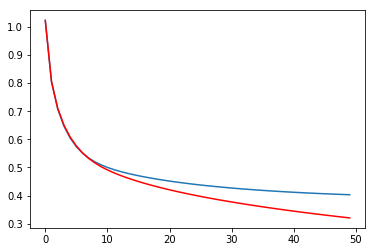

In [13]:
plt.figure(0)
plt.plot(val_loss)
plt.plot(training_loss,color='red')
plt.show()

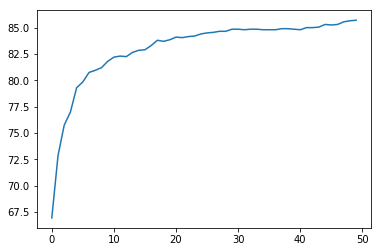

In [14]:
plt.figure(0)
plt.plot(val_acc)
plt.show()